## <font color='blue'>Education Analysis – School Data Analysis with Pandas</font>

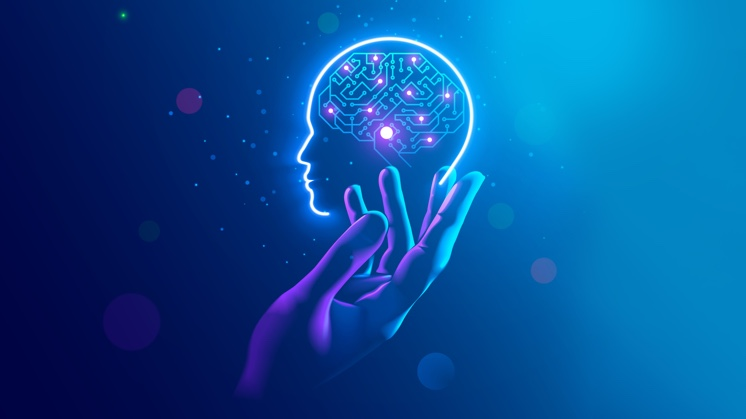

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:
# Load the schools dataset
schools_data = pd.read_csv("datasets/schools_dataset.csv")

In [3]:
# Shape
schools_data.shape

(15, 5)

In [4]:
# View
schools_data.head()

,ID_School,Name_School,Type_School,Stundents_Number,Annual_Budget
0,0,School A,Public,2917,1910635
1,1,School B,Public,2949,1884411
2,2,School C,Private,1761,1056600
3,3,School D,Public,4635,3022020
4,4,School E,Private,1468,917500


In [5]:
# Student dataset
students_data = pd.read_csv("datasets/students_dataset.csv")

In [6]:
# Shape
students_data.shape

(39160, 7)

In [7]:
# Visualiza
students_data.head()

,ID_Student,Name_Student,Gender,School_Grade,Name_School,Writing_Grade,Math_Grade
0,0,Kevin Bradley,M,6,School A,66,79
1,1,Paul Smith,M,9,School A,94,61
2,2,John Rodriguez,M,9,School A,90,60
3,3,Oliver Scott,M,9,School A,67,58
4,4,William Ray,F,6,School A,97,84


In [8]:
# Combine the datasets
full_data = pd.merge(students_data, schools_data, how = "left", on = ["Name_School", "Name_School"])

In [9]:
# Shape
full_data.shape

(39160, 11)

In [10]:
# Visualiza
full_data.head()

,ID_Student,Name_Student,Gender,School_Grade,Name_School,Writing_Grade,Math_Grade,ID_School,Type_School,Stundents_Number,Annual_Budget
0,0,Kevin Bradley,M,6,School A,66,79,0,Public,2917,1910635
1,1,Paul Smith,M,9,School A,94,61,0,Public,2917,1910635
2,2,John Rodriguez,M,9,School A,90,60,0,Public,2917,1910635
3,3,Oliver Scott,M,9,School A,67,58,0,Public,2917,1910635
4,4,William Ray,F,6,School A,97,84,0,Public,2917,1910635


In [11]:
# School series 
full_data["School_Grade"].unique()

array([6, 9, 8, 7], dtype=int64)

In [12]:
# Gender
full_data["Gender"].unique()

array(['M', 'F'], dtype=object)

> **1- How many schools do we have data?**

In [13]:
total_schools = len(full_data["Name_School"].unique())
total_schools

15

> **2- What is the total number of student records in the database?**

In [14]:
total_students = full_data['ID_Student'].count()
total_students

39160

> **3- What is the total budget considering all schools?**

In [15]:
total_budget = schools_data["Annual_Budget"].sum()
total_budget

24649428

> **4- What is the average grade of students in Writing?**

In [16]:
writing_avg = full_data["Writing_Grade"].mean()
writing_avg

81.87574055158325

> **5- What is the average grade of students in Mathematics?**

In [17]:
math_average = full_data["Math_Grade"].mean()
math_average

78.98493360572012

> **6- Considering that the passing grade is 70, how many students were approved in Writing? (Deliver the result in absolute value and percentage)**

In [18]:
writing_approved_count = full_data[(full_data["Writing_Grade"] >= 70)].count()["Name_Student"]
writing_approved_count

33600

In [19]:
writing_approved_perc = writing_approved_count / float(total_students) * 100
writing_approved_perc

85.80183861082737

> **7- Considering that the passing grade is 70, how many students passed in Mathematics? (Deliver the result in absolute value and percentage)**

In [20]:
math_approved_count = full_data[(full_data["Math_Grade"] >= 70)].count()["Name_Student"]
math_approved_count

29360

In [21]:
math_approved_perc = math_approved_count / float(total_students) * 100
math_approved_perc

74.97446373850867

> **8- Considering that the passing grade is 70, how many students passed in Mathematics and Writing? (Deliver the result in absolute value and percentage)**

In [22]:
approved_total_count = full_data[(full_data["Math_Grade"] >= 70) 
                                                  & (full_data["Writing_Grade"] >= 70)].count()["Name_Student"]  
approved_total_count

25518

In [23]:
approved_total_perc = approved_total_count /  float(total_students) * 100
approved_total_perc

65.16343207354444

> **9- Create a dataframe with the results of questions 1 to 8 that you calculated above. (Hint: create a dictionary and then convert to Pandas dataframe)**

In [24]:
df_school_performance = pd.DataFrame({"Total Schools": [total_schools], 
                                       "Total Students": [total_students], 
                                       "Total Budget": [total_budget],
                                       "Average Writing Grade": [writing_avg], 
                                       "Average Math Score": [math_average],
                                       "% Writing Approval": [writing_approved_perc],
                                       "% Math Approval": [math_approved_perc],
                                       "% Total Approval": [approved_total_perc]})

In [25]:
df_school_performance

,Total Schools,Total Students,Total Budget,Average Writing Grade,Average Math Score,% Writing Approval,% Math Approval,% Total Approval
0,15,39160,24649428,81.875741,78.984934,85.801839,74.974464,65.163432


In [26]:
type(df_school_performance)

pandas.core.frame.DataFrame

> **10- Format the "Total Students" and "Total Budget" columns by adjusting the decimal places.**

In [27]:
df_school_performance["Total Students"] = df_school_performance["Total Students"].map("{:,}".format)
df_school_performance["Total Budget"] = df_school_performance["Total Budget"].map("${:,.2f}".format)

In [28]:
df_school_performance

,Total Schools,Total Students,Total Budget,Average Writing Grade,Average Math Score,% Writing Approval,% Math Approval,% Total Approval
0,15,"39,160","$24,649,428.00",81.875741,78.984934,85.801839,74.974464,65.163432


## Data Analysis with Pandas

**1- Among the students approved in Writing, which genre obtained the highest number of approvals?**

In [29]:
approved_by_genre_writ = full_data[(full_data["Writing_Grade"] >= 70)]["Gender"].value_counts()
approved_by_genre_writ

F    17027
M    16573
Name: Gender, dtype: int64

**2- Among the students approved in Mathematics, which gender had the highest number of approvals?**

In [30]:
approved_by_genre_math = full_data[ (full_data['Math_Grade'] >= 70) ]['Gender'].value_counts()
approved_by_genre_math

F    14835
M    14525
Name: Gender, dtype: int64

**3- What types of all schools in our database?**

In [31]:
schools_data['Type_School'].value_counts()

Private    8
Public     7
Name: Type_School, dtype: int64

In [32]:
## It is a strategy to perform aggregation by index. Transforms a column into an index and subsequently performs aggregation.
schools_type = schools_data.set_index(["Name_School"])["Type_School"].sort_values()
schools_type

Name_School
School C    Private
School E    Private
School F    Private
School G    Private
School I    Private
School J    Private
School K    Private
School O    Private
School A     Public
School B     Public
School D     Public
School H     Public
School L     Public
School M     Public
School N     Public
Name: Type_School, dtype: object

**4- What is the total number of students per school?**

In [33]:
students_per_school = full_data['Name_School'].value_counts().sort_values()
students_per_school

School I     427
School J     962
School E    1468
School O    1625
School C    1761
School K    1800
School G    1858
School F    2283
School N    2739
School A    2917
School B    2949
School L    3999
School D    4635
School M    4761
School H    4976
Name: Name_School, dtype: int64

**5- What is the total budget of each school per capita (per student)?**

In [34]:
## Column grouping
## Total budget by school name
budget_school = full_data.groupby('Name_School').mean()['Annual_Budget'].sort_values()
budget_school

Name_School
School I     248087.0
School J     585858.0
School E     917500.0
School O    1043130.0
School K    1049400.0
School C    1056600.0
School G    1081356.0
School F    1319574.0
School N    1763916.0
School B    1884411.0
School A    1910635.0
School L    2547363.0
School D    3022020.0
School M    3094650.0
School H    3124928.0
Name: Annual_Budget, dtype: float64

In [35]:
## per capita calculation
budget_school_percapita = (budget_school / students_per_school).sort_values()
budget_school_percapita

School F    578.000000
School I    581.000000
School G    582.000000
School K    583.000000
School C    600.000000
School J    609.000000
School E    625.000000
School H    628.000000
School L    637.000000
School B    639.000000
School O    641.926154
School N    644.000000
School M    650.000000
School D    652.000000
School A    655.000000
dtype: float64

**6- What is the average grade of students in Writing for each school?**

In [36]:
avg_school_writ = full_data.groupby('Name_School').mean()['Writing_Grade'].sort_values()
avg_school_writ

Name_School
School L    80.744686
School N    80.746258
School D    80.934412
School M    80.966394
School H    81.033963
School B    81.158020
School A    81.182722
School C    83.725724
School O    83.810462
School I    83.814988
School E    83.816757
School K    83.955000
School G    83.975780
School F    83.989488
School J    84.044699
Name: Writing_Grade, dtype: float64

**7- What is the average score of students in Mathematics for each school?**

In [37]:
avg_school_math = full_data.groupby(full_data['Name_School']).mean()['Math_Grade'].sort_values()
avg_school_math

Name_School
School A    76.629414
School B    76.711767
School L    76.842711
School H    77.048432
School M    77.072464
School N    77.102592
School D    77.289752
School G    83.061895
School F    83.274201
School E    83.351499
School C    83.359455
School O    83.435077
School K    83.682222
School I    83.803279
School J    83.839917
Name: Math_Grade, dtype: float64

**8- Considering only students approved in Writing, what is the average number of students approved per school?**

In [38]:
# Students approved in Writing
appr_writ = full_data[(full_data['Writing_Grade'] >= 70)]

# Average grade in Writing by school considering those approved in Writing
avg_appr_writ = (appr_writ.groupby(['Name_School']).count()['Name_Student'] / students_per_school * 100).sort_values() 
avg_appr_writ

School N    79.299014
School L    80.220055
School B    80.739234
School D    80.862999
School M    81.222432
School A    81.316421
School H    81.933280
School C    95.854628
School J    95.945946
School I    96.252927
School F    96.539641
School K    96.611111
School G    97.039828
School E    97.138965
School O    97.292308
dtype: float64

**9- Considering only the students approved in Mathematics, what is the average number of students approved per school?**

In [39]:
# Students approved in Mathematics
appr_math = full_data[(full_data["Math_Grade"] >= 70)]

# Average grade in Mathematics per school considering those approved in Mathematics
avg_appr_mat_school = (appr_math.groupby(["Name_School"]).count()["Name_Student"] / students_per_school * 100).sort_values()
avg_appr_mat_school

School A    65.683922
School B    65.988471
School M    66.057551
School L    66.366592
School H    66.680064
School D    66.752967
School N    68.309602
School I    92.505855
School O    93.230769
School K    93.333333
School E    93.392371
School C    93.867121
School F    93.867718
School G    94.133477
School J    94.594595
dtype: float64

**10- Considering students approved in Mathematics and Writing, what was the average number of students approved per school?**

In [40]:
## Create subset in which there was approval in Writing and Mathematics
appr_math_writ = full_data[(full_data["Writing_Grade"] >= 70) & (full_data["Math_Grade"] >= 70)]

## Grouping by School name, and counting. Return the student's name and finally divide by the total and multiply by 100 to obtain the average, sorting.
appr_rate_writ_math = (appr_math_writ.groupby(["Name_School"]).count()["Name_Student"] / students_per_school * 100).sort_values()
appr_rate_writ_math

School L    52.988247
School B    53.204476
School A    53.513884
School D    53.527508
School M    53.539172
School N    54.289887
School H    54.642283
School I    89.227166
School C    89.892107
School K    90.333333
School J    90.540541
School F    90.582567
School E    90.599455
School O    90.892308
School G    91.334769
dtype: float64

Let's build a summary dataframe with the previous metrics.

In [41]:
df_summary_school_performance = pd.DataFrame({"Type of School": schools_type,
                                              "Total Students": students_per_school,
                                              "Total Budget": budget_school,
                                              "Budget Per Student": budget_school_percapita,
                                              "Average Writing Approval Grade": avg_school_writ,
                                              "Average Mathematics Approval Grade": avg_school_math,
                                              "% Approved Writing": avg_appr_writ,
                                              "% Approved Math": avg_appr_mat_school,
                                              "% General Approved": appr_rate_writ_math})

In [42]:
df_summary_school_performance

,Type of School,Total Students,Total Budget,Budget Per Student,Average Writing Approval Grade,Average Mathematics Approval Grade,% Approved Writing,% Approved Math,% General Approved
School A,Public,2917,1910635.0,655.000000,81.182722,76.629414,81.316421,65.683922,53.513884
School B,Public,2949,1884411.0,639.000000,81.158020,76.711767,80.739234,65.988471,53.204476
School C,Private,1761,1056600.0,600.000000,83.725724,83.359455,95.854628,93.867121,89.892107
School D,Public,4635,3022020.0,652.000000,80.934412,77.289752,80.862999,66.752967,53.527508
School E,Private,1468,917500.0,625.000000,83.816757,83.351499,97.138965,93.392371,90.599455
School F,Private,2283,1319574.0,578.000000,83.989488,83.274201,96.539641,93.867718,90.582567
School G,Private,1858,1081356.0,582.000000,83.975780,83.061895,97.039828,94.133477,91.334769
School H,Public,4976,3124928.0,628.000000,81.033963,77.048432,81.933280,66.680064,54.642283
School I,Private,427,248087.0,581.000000,83.814988,83.803279,96.252927,92.505855,89.227166
School J,Private,962,585858.0,609.000000,84.044699,83.839917,95.945946,94.594595,90.540541


We formatted some columns.

In [43]:
df_summary_school_performance["Total Budget"] = df_summary_school_performance["Total Budget"].map("${:,.2f}".format)
df_summary_school_performance["Budget Per Student"] = df_summary_school_performance["Budget Per Student"].map("${:,.2f}".format)


In [44]:
df_summary_school_performance

,Type of School,Total Students,Total Budget,Budget Per Student,Average Writing Approval Grade,Average Mathematics Approval Grade,% Approved Writing,% Approved Math,% General Approved
School A,Public,2917,"$1,910,635.00",$655.00,81.182722,76.629414,81.316421,65.683922,53.513884
School B,Public,2949,"$1,884,411.00",$639.00,81.158020,76.711767,80.739234,65.988471,53.204476
School C,Private,1761,"$1,056,600.00",$600.00,83.725724,83.359455,95.854628,93.867121,89.892107
School D,Public,4635,"$3,022,020.00",$652.00,80.934412,77.289752,80.862999,66.752967,53.527508
School E,Private,1468,"$917,500.00",$625.00,83.816757,83.351499,97.138965,93.392371,90.599455
School F,Private,2283,"$1,319,574.00",$578.00,83.989488,83.274201,96.539641,93.867718,90.582567
School G,Private,1858,"$1,081,356.00",$582.00,83.975780,83.061895,97.039828,94.133477,91.334769
School H,Public,4976,"$3,124,928.00",$628.00,81.033963,77.048432,81.933280,66.680064,54.642283
School I,Private,427,"$248,087.00",$581.00,83.814988,83.803279,96.252927,92.505855,89.227166
School J,Private,962,"$585,858.00",$609.00,84.044699,83.839917,95.945946,94.594595,90.540541


In [45]:
df_summary_school_performance.describe()

,Total Students,Average Writing Approval Grade,Average Mathematics Approval Grade,% Approved Writing,% Approved Math,% General Approved
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2610.666667,82.526623,80.433645,89.217919,80.984294,73.273847
std,1421.408339,1.516973,3.375608,8.179495,13.996232,18.988451
min,427.000000,80.744686,76.629414,79.299014,65.683922,52.988247
25%,1693.000000,81.000178,77.060448,81.042716,66.523328,53.533340
50%,2283.000000,83.725724,83.061895,95.854628,92.505855,89.227166
75%,3474.000000,83.885879,83.397266,96.575376,93.629746,90.561554
max,4976.000000,84.044699,83.839917,97.292308,94.594595,91.334769


**11-A- Considering the overall pass rate, which are the 5 schools with the best performance?**

In [46]:
top_schools = df_summary_school_performance.sort_values(["% General Approved"], ascending = False)
top_schools.head(5)

,Type of School,Total Students,Total Budget,Budget Per Student,Average Writing Approval Grade,Average Mathematics Approval Grade,% Approved Writing,% Approved Math,% General Approved
School G,Private,1858,"$1,081,356.00",$582.00,83.975780,83.061895,97.039828,94.133477,91.334769
School O,Private,1625,"$1,043,130.00",$641.93,83.810462,83.435077,97.292308,93.230769,90.892308
School E,Private,1468,"$917,500.00",$625.00,83.816757,83.351499,97.138965,93.392371,90.599455
School F,Private,2283,"$1,319,574.00",$578.00,83.989488,83.274201,96.539641,93.867718,90.582567
School J,Private,962,"$585,858.00",$609.00,84.044699,83.839917,95.945946,94.594595,90.540541


**11-B- Considering the overall pass rate, which are the 5 schools with the worst performance?**

In [47]:
bottom_schools = df_summary_school_performance.sort_values(["% General Approved"], ascending = True)
bottom_schools.head(5)

,Type of School,Total Students,Total Budget,Budget Per Student,Average Writing Approval Grade,Average Mathematics Approval Grade,% Approved Writing,% Approved Math,% General Approved
School L,Public,3999,"$2,547,363.00",$637.00,80.744686,76.842711,80.220055,66.366592,52.988247
School B,Public,2949,"$1,884,411.00",$639.00,81.158020,76.711767,80.739234,65.988471,53.204476
School A,Public,2917,"$1,910,635.00",$655.00,81.182722,76.629414,81.316421,65.683922,53.513884
School D,Public,4635,"$3,022,020.00",$652.00,80.934412,77.289752,80.862999,66.752967,53.527508
School M,Public,4761,"$3,094,650.00",$650.00,80.966394,77.072464,81.222432,66.057551,53.539172


In [48]:
full_data.columns

Index(['ID_Student', 'Name_Student', 'Gender', 'School_Grade', 'Name_School',
       'Writing_Grade', 'Math_Grade', 'ID_School', 'Type_School',
       'Stundents_Number', 'Annual_Budget'],
      dtype='object')

**12- In each grade, which school had the students with the best performance in Mathematics?**

In [49]:
sixth_grade = full_data[(full_data["School_Grade"] == 6)]
seventh_grade = full_data[(full_data["School_Grade"] == 7)]
eighth_grade = full_data[(full_data["School_Grade"] == 8)]
ninth_grade = full_data[(full_data["School_Grade"] == 9)]

In [50]:
sixth_grade.head()

,ID_Student,Name_Student,Gender,School_Grade,Name_School,Writing_Grade,Math_Grade,ID_School,Type_School,Stundents_Number,Annual_Budget
0,0,Kevin Bradley,M,6,School A,66,79,0,Public,2917,1910635
4,4,William Ray,F,6,School A,97,84,0,Public,2917,1910635
5,5,James Miranda,M,6,School A,94,94,0,Public,2917,1910635
12,12,Sebastian Walker,F,6,School A,64,79,0,Public,2917,1910635
13,13,Mateo Long,M,6,School A,71,79,0,Public,2917,1910635


In [51]:
notes_sixth_grade = sixth_grade.groupby(["Name_School"]).mean()["Math_Grade"]
notes_seventh_grade = seventh_grade.groupby(["Name_School"]).mean()["Math_Grade"]
notes_eighth_grade = eighth_grade.groupby(["Name_School"]).mean()["Math_Grade"]
notes_ninth_grade = ninth_grade.groupby(["Name_School"]).mean()["Math_Grade"]

In [52]:
grades_per_series = pd.DataFrame({"Sixth Grade": notes_sixth_grade, 
                                "Seventh Grade": notes_seventh_grade,
                                "Eighth Grade": notes_eighth_grade, 
                                "Ninth Grade": notes_ninth_grade})

In [53]:
grades_per_series.sort_values(by = "Name_School")

,Sixth Grade,Seventh Grade,Eighth Grade,Ninth Grade
Name_School,,,,
School A,77.027251,75.908735,76.446602,77.225641
School B,76.403037,76.539974,76.884344,77.151369
School C,83.420755,82.917411,83.383495,83.778976
School D,77.438495,77.337408,77.136029,77.186567
School E,82.044010,84.229064,83.842105,83.356164
School F,83.085578,83.724422,83.195326,83.035794
School G,83.094697,83.154506,82.765560,83.277487
School H,77.083676,76.996772,77.515588,76.492218
School I,83.787402,83.429825,85.000000,82.855422


In [54]:
grades_per_series["Sixth Grade"].idxmax()

'School I'

In [55]:
grades_per_series["Seventh Grade"].idxmax()

'School E'

In [56]:
grades_per_series["Eighth Grade"].idxmax()

'School I'

In [57]:
grades_per_series["Ninth Grade"].idxmax()

'School J'

**13- Considering the spending ranges per student as being: [0, 585, 630, 645, 680], which range results in students with better performance?**

In [58]:
df_summary_school_performance.columns

Index(['Type of School', 'Total Students', 'Total Budget',
       'Budget Per Student', 'Average Writing Approval Grade',
       'Average Mathematics Approval Grade', '% Approved Writing',
       '% Approved Math', '% General Approved'],
      dtype='object')

In [59]:
group_bins = [0, 585, 630, 645, 680]
group_labels = ["<$585", "$585-630", "$630-645", "$645-680"]

In [60]:
## Add column with division by range. Division by Category
df_summary_school_performance["Range of Spending Per Student"] = pd.cut(budget_school_percapita, 
                                                                        group_bins, 
                                                                        labels = group_labels, 
                                                                        right = False)

In [61]:
df_summary_school_performance

,Type of School,Total Students,Total Budget,Budget Per Student,Average Writing Approval Grade,Average Mathematics Approval Grade,% Approved Writing,% Approved Math,% General Approved,Range of Spending Per Student
School A,Public,2917,"$1,910,635.00",$655.00,81.182722,76.629414,81.316421,65.683922,53.513884,$645-680
School B,Public,2949,"$1,884,411.00",$639.00,81.158020,76.711767,80.739234,65.988471,53.204476,$630-645
School C,Private,1761,"$1,056,600.00",$600.00,83.725724,83.359455,95.854628,93.867121,89.892107,$585-630
School D,Public,4635,"$3,022,020.00",$652.00,80.934412,77.289752,80.862999,66.752967,53.527508,$645-680
School E,Private,1468,"$917,500.00",$625.00,83.816757,83.351499,97.138965,93.392371,90.599455,$585-630
School F,Private,2283,"$1,319,574.00",$578.00,83.989488,83.274201,96.539641,93.867718,90.582567,<$585
School G,Private,1858,"$1,081,356.00",$582.00,83.975780,83.061895,97.039828,94.133477,91.334769,<$585
School H,Public,4976,"$3,124,928.00",$628.00,81.033963,77.048432,81.933280,66.680064,54.642283,$585-630
School I,Private,427,"$248,087.00",$581.00,83.814988,83.803279,96.252927,92.505855,89.227166,<$585
School J,Private,962,"$585,858.00",$609.00,84.044699,83.839917,95.945946,94.594595,90.540541,$585-630


In [62]:
df_summary_school_performance.columns

Index(['Type of School', 'Total Students', 'Total Budget',
       'Budget Per Student', 'Average Writing Approval Grade',
       'Average Mathematics Approval Grade', '% Approved Writing',
       '% Approved Math', '% General Approved',
       'Range of Spending Per Student'],
      dtype='object')

In [63]:
## Group the subsets
df_13_1 = df_summary_school_performance.groupby(["Range of Spending Per Student"]).mean()["Average Writing Approval Grade"]
df_13_2 = df_summary_school_performance.groupby(["Range of Spending Per Student"]).mean()["Average Mathematics Approval Grade"]
df_13_3 = df_summary_school_performance.groupby(["Range of Spending Per Student"]).mean()["% Approved Writing"]
df_13_4 = df_summary_school_performance.groupby(["Range of Spending Per Student"]).mean()["% Approved Math"]
df_13_5 = df_summary_school_performance.groupby(["Range of Spending Per Student"]).mean()["% General Approved"]

In [64]:
df_budget_performance = pd.DataFrame({"Average Writing" : df_13_1.round(2),
                                      "Math Average": df_13_2.round(2),
                                      "% Approved Writing": df_13_3.round(2),
                                      "% Approved Math": df_13_4.round(2),
                                      "% Overall Approved": df_13_5.round(2)})

In [65]:
df_budget_performance

,Average Writing,Math Average,% Approved Writing,% Approved Math,% Overall Approved
Range of Spending Per Student,,,,,
<$585,83.93,83.46,96.61,93.46,90.37
$585-630,83.16,81.90,92.72,87.13,81.42
$630-645,81.61,78.52,84.39,73.47,62.84
$645-680,81.03,77.00,81.13,66.16,53.53


**14- Considering the size ranges (number of students) of schools as being: [0, 1000, 2000, 5000], which range results in students with better performance?**

In [66]:
df_summary_school_performance.columns

Index(['Type of School', 'Total Students', 'Total Budget',
       'Budget Per Student', 'Average Writing Approval Grade',
       'Average Mathematics Approval Grade', '% Approved Writing',
       '% Approved Math', '% General Approved',
       'Range of Spending Per Student'],
      dtype='object')

In [67]:
size_bins = [0, 1000, 2000, 5000]
labels_size = ["Small Size (<1000)", "Midsize (1000-2000)", "Large Size (2000-5000)"]

In [68]:
## Add column with division by range. Division by Category
df_summary_school_performance["School Size"] = pd.cut(df_summary_school_performance["Total Students"], 
                                                         size_bins, 
                                                         labels = labels_size, 
                                                         right = False)

In [69]:
df_summary_school_performance

,Type of School,Total Students,Total Budget,Budget Per Student,Average Writing Approval Grade,Average Mathematics Approval Grade,% Approved Writing,% Approved Math,% General Approved,Range of Spending Per Student,School Size
School A,Public,2917,"$1,910,635.00",$655.00,81.182722,76.629414,81.316421,65.683922,53.513884,$645-680,Large Size (2000-5000)
School B,Public,2949,"$1,884,411.00",$639.00,81.158020,76.711767,80.739234,65.988471,53.204476,$630-645,Large Size (2000-5000)
School C,Private,1761,"$1,056,600.00",$600.00,83.725724,83.359455,95.854628,93.867121,89.892107,$585-630,Midsize (1000-2000)
School D,Public,4635,"$3,022,020.00",$652.00,80.934412,77.289752,80.862999,66.752967,53.527508,$645-680,Large Size (2000-5000)
School E,Private,1468,"$917,500.00",$625.00,83.816757,83.351499,97.138965,93.392371,90.599455,$585-630,Midsize (1000-2000)
School F,Private,2283,"$1,319,574.00",$578.00,83.989488,83.274201,96.539641,93.867718,90.582567,<$585,Large Size (2000-5000)
School G,Private,1858,"$1,081,356.00",$582.00,83.975780,83.061895,97.039828,94.133477,91.334769,<$585,Midsize (1000-2000)
School H,Public,4976,"$3,124,928.00",$628.00,81.033963,77.048432,81.933280,66.680064,54.642283,$585-630,Large Size (2000-5000)
School I,Private,427,"$248,087.00",$581.00,83.814988,83.803279,96.252927,92.505855,89.227166,<$585,Small Size (<1000)
School J,Private,962,"$585,858.00",$609.00,84.044699,83.839917,95.945946,94.594595,90.540541,$585-630,Small Size (<1000)


In [70]:
## Group the subsets
df_14_1 = df_summary_school_performance.groupby(["School Size"]).mean()["Average Writing Approval Grade"]
df_14_2 = df_summary_school_performance.groupby(["School Size"]).mean()["Average Mathematics Approval Grade"]
df_14_3 = df_summary_school_performance.groupby(["School Size"]).mean()["% Approved Writing"]
df_14_4 = df_summary_school_performance.groupby(["School Size"]).mean()["% Approved Math"]
df_14_5 = df_summary_school_performance.groupby(["School Size"]).mean()["% General Approved"]

In [71]:
df_summary_school_performance.columns

Index(['Type of School', 'Total Students', 'Total Budget',
       'Budget Per Student', 'Average Writing Approval Grade',
       'Average Mathematics Approval Grade', '% Approved Writing',
       '% Approved Math', '% General Approved',
       'Range of Spending Per Student', 'School Size'],
      dtype='object')

In [72]:
df_performance_size = pd.DataFrame({"Average Writing" : df_14_1.round(2),
                                       "Average Math": df_14_2.round(2),
                                       "% Approved Essay": df_14_3.round(2),
                                       "% Approved Math": df_14_4.round(2),
                                       "% Averall Approved": df_14_5.round(2)})

In [73]:
df_performance_size

,Average Writing,Average Math,% Approved Essay,% Approved Math,% Averall Approved
School Size,,,,,
Small Size (<1000),83.93,83.82,96.10,93.55,89.88
Midsize (1000-2000),83.86,83.38,96.79,93.59,90.61
Large Size (2000-5000),81.34,77.75,82.77,69.96,58.29


**15- What is the impact of the type of school on student performance?**

In [74]:
df_summary_school_performance.columns

Index(['Type of School', 'Total Students', 'Total Budget',
       'Budget Per Student', 'Average Writing Approval Grade',
       'Average Mathematics Approval Grade', '% Approved Writing',
       '% Approved Math', '% General Approved',
       'Range of Spending Per Student', 'School Size'],
      dtype='object')

In [75]:
## Add column with division by range. Division by Category
df_15_1 = df_summary_school_performance.groupby(["Type of School"]).mean()["Average Writing Approval Grade"]
df_15_2 = df_summary_school_performance.groupby(["Type of School"]).mean()["Average Mathematics Approval Grade"]
df_15_3 = df_summary_school_performance.groupby(["Type of School"]).mean()["% Approved Writing"]
df_15_4 = df_summary_school_performance.groupby(["Type of School"]).mean()["% Approved Math"]
df_15_5 = df_summary_school_performance.groupby(["Type of School"]).mean()["% General Approved"]

In [76]:
## Group the subsets
df_performance_type_school = pd.DataFrame({"Average Writing": df_15_1.round(2),
                                           "Average Math": df_15_2.round(2),
                                           "% Approved Writing": df_15_3.round(2),
                                           "% Approved  Math": df_15_4.round(2),
                                           "% Overall Approved": df_15_5.round(2)})

In [77]:
df_performance_type_school

,Average Writing,Average Math,% Approved Writing,% Approved Math,% Overall Approved
Type of School,,,,,
Private,83.89,83.48,96.58,93.62,90.43
Public,80.97,76.96,80.80,66.55,53.67


In [78]:
df_summary_school_performance.to_excel('datasets/df_summary_school_performance.xlsx')

## Disclaimer: 
A good part of this project was largely done in the Data Science Academy, Big Data Analytics with R and  Microsoft Azure Machine Learning course (part of the Data Scientist training)

# End